```{index} Differential equations; demonstration for bending
```

(lesson2.1)=
# Lesson Monday September 8th

During today's lesson it's demonstrated how you to use differential equations to solve structural problems.

## Demonstration
Given a structure as shown below:

```{figure} intro_data/structure.svg
:align: center
```

We can calculate the force distribution and displacements of this structure using differential equations. For this structure only consisting of bending elements, $ EI \cfrac{{d}^4w}{{d}x^4} = q_z$ is enough to solve it.

First, let's define the segments with continuous loads. This requires splitting the element AB into two because the distributed load causes a discontinuity.

Now, each segment can be drawn separately, indicating the loads, coordinate systems, dimensions and section forces at the edges of each segment.

For AC this leads to:

```{figure} intro_data/FBD_AC.svg
:align: center

Free body diagram element AC
```

For BC this leads to:

```{figure} intro_data/FBD_BC.svg
:align: center

Free body diagram element BC
```

### Element AC

As this element is unloaded, the load equation for this element gives:

$$q_{z,{\rm{AC}}}=0$$

leading to the equations:

$$ V_{\rm{AC}} \left(x\right) = C_1$$

$$ M_{\rm{AC}} \left(x\right) = C_1 \cdot x + C_2 $$

$$ \kappa_{\rm{AC}} \left(x\right) = \cfrac{C_1 \cdot x + C_2}{5000}$$

$$ \varphi_{\rm{AC}} \left(x\right) = \cfrac{\cfrac{1}{2}\cdot C_1 \cdot x^2 + C_2 \cdot x}{5000} + C_3$$

$$ w_{\rm{AC}} \left(x\right) = \cfrac{-\cfrac{1}{6}\cdot C_1 \cdot x^3 - \cfrac{1}{2} C_2 \cdot x^2}{5000} - C_3 \cdot x + C_4$$

Because of the support at A a boundary condition can be formulated as:

```{math}
:label: BC_1
w_{\rm{AC}} \left(0\right) = 0
```

Because A is also the end of the beam, another boundary condition can be formulated as:

```{math}
:label: BC_2
M_{\rm{AC}} \left(0\right) = 0
```

### Element BC

As this element is loaded, the load equation for this element gives:

$$q_{z,\rm{BC}}=10$$

leading to the equations:

$$ V_{\rm{BC}} \left(x\right) = -10 \cdot x + C_5$$

$$ M_{\rm{BC}} \left(x\right) = -5 \cdot x^2 + C_5 \cdot x + C_6 $$

$$ \kappa_{\rm{BC}} \left(x\right) = \cfrac{-5 \cdot x^2 + C_5 \cdot x + C_6}{5000}$$

$$ \varphi_{\rm{BC}} \left(x\right) = \cfrac{-\cfrac{5}{3} \cdot x^3 + \cfrac{1}{2}\cdot C_5 \cdot x^2 + C_6 \cdot x}{5000} + C_7$$

$$ w_{\rm{BC}} \left(x\right) = \cfrac{\cfrac{5}{12} \cdot x^4 -\cfrac{1}{6}\cdot C_5 \cdot x^3 - \cfrac{1}{2} C_6 \cdot x^2}{5000} - C_7 \cdot x + C_8$$

Because of the support at B, two boundary conditions can be formulated directly:

```{math}
:label: BC_3
\varphi_{\rm{BC}} \left(4\right) = 0
```

```{math}
:label: BC_4
w_{\rm{BC}} \left(4\right) = 0
```

### Interface conditions

At C a boundary condition can be identified from the consistency of displacements: both the downwards and rotational displacement of  must be the same as the downwards and rotational displacement of the left of element BE:

```{math}
:label: BC_5
w_{\rm{AC}} \left(4\right) = w_{\rm{BC}} \left(0\right)
```

```{math}
:label: BC_6
\varphi_{\rm{AC}} \left(4\right) = \varphi_{\rm{BC}} \left(0 \right)
```

Finally, there should be consistency with the section forces too, as shown in the free body diagram:

```{figure} intro_data/FBD_C.svg
:align: center

Free body diagram node C
```

Vertical equilibrium gives:

```{math}
:label: BC_7
\sum {{{\left. {{F_{\rm{v}}}} \right|}^{\rm{C}}} = 0}  \to -{V_{\rm{AC}}}\left(4\right) + V_{\rm{BC}}\left(0\right) = 0
```

Moment equilibrium gives:

```{math}
:label: BC_8
\sum {{{\left. {{T}} \right|}_{\rm{C}}^{\rm{C}}} = 0}  \to -{M_{{\rm{AC}}}}\left(4\right) + M_{\rm{BC}}\left(0\right) = 0
```

### Solve system of equations

8 boundary conditions have been formulated with 8 integration constants. These can now be solved. You're advised to use your calculator or a symbolic programming tool to solve this.

Filling in the boundary conditions gives:

$$
\begin{align}
C_{4} = 0 \\
C_{2} = 0 \\
- \cfrac{4 C_{5}}{1875} - \cfrac{C_{6}}{625} - 4 C_{7} + C_{8} + \cfrac{8}{375} = 0 \\
\cfrac{C_{5}}{625} + \cfrac{C_{6}}{1250} + C_{7} - \cfrac{8}{375} = 0 \\
- \cfrac{4 C_{1}}{1875} - \cfrac{C_{2}}{625} - 4 C_{3} + C_{4} - C_{8} = 0 \\
\cfrac{C_{1}}{625} + \cfrac{C_{2}}{1250} + C_{3} - C_{7} = 0 \\
4 C_{1} + C_{2} - C_{6} = 0 \\
C_{1} - C_{5} = 0 \\
\end{align}
$$

Solving this gives:

$$
\begin{align}
C_{1} = \cfrac{35}{8} = 4.375 \\
C_{2} = 0 \\
C_{3} = \cfrac{1}{150} \approx -0.006667 \\
C_{4} = 0 \\
C_{5} = \cfrac{35}{8} = 4.375\\
C_{6} = \cfrac{35}{2} = 17.5 \\
C_{7} = \cfrac{1}{3000} \approx 0.0003333\\
C_{8} = \cfrac{13}{750} \approx 0.01733
\end{align}
$$

Now, the full force distribution and displacements of the structure has been solved. For example the moment distribution in BC which can be plotted as:

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']
sym.init_printing()

x = sym.symbols('x')

q = 10 
EI = 5000 
EA = 20000 
F = 150

q_AC = 0
q_BC = q

C_1, C_2, C_3, C_4 = sym.symbols('C_1 C_2 C_3 C_4')
C_5, C_6, C_7, C_8 = sym.symbols('C_5 C_6 C_7 C_8')

V_AC = -sym.integrate(q_AC, x) + C_1
M_AC = sym.integrate(V_AC, x) + C_2
kappa_AC = M_AC/EI
phi_AC = sym.integrate(kappa_AC, x) + C_3
w_AC = -sym.integrate(phi_AC, x) + C_4

V_BC = -sym.integrate(q_BC, x) + C_5
M_BC = sym.integrate(V_BC, x) + C_6
kappa_BC = M_BC/EI
phi_BC = sym.integrate(kappa_BC, x) + C_7
w_BC = -sym.integrate(phi_BC, x) + C_8

eq1 = sym.Eq(w_AC.subs(x,0),0)
eq2 = sym.Eq(M_AC.subs(x,0),0)
eq3 = sym.Eq(w_BC.subs(x,4),0)
eq4 = sym.Eq(phi_BC.subs(x,4),0)
eq5 = sym.Eq(w_AC.subs(x,4)-w_BC.subs(x,0),0)
eq6 = sym.Eq(phi_AC.subs(x,4)-phi_BC.subs(x,0),0)
eq7 = sym.Eq(M_AC.subs(x,4) - M_BC.subs(x,0),0)
eq8 = sym.Eq(V_AC.subs(x,4) - V_BC.subs(x,0),0)

display(eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8)
for eq in [eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8]:
    print(sym.latex(eq))


C_{4} = 0
C_{2} = 0
- \frac{4 C_{5}}{1875} - \frac{C_{6}}{625} - 4 C_{7} + C_{8} + \frac{8}{375} = 0
\frac{C_{5}}{625} + \frac{C_{6}}{1250} + C_{7} - \frac{8}{375} = 0
- \frac{4 C_{1}}{1875} - \frac{C_{2}}{625} - 4 C_{3} + C_{4} - C_{8} = 0
\frac{C_{1}}{625} + \frac{C_{2}}{1250} + C_{3} - C_{7} = 0
4 C_{1} + C_{2} - C_{6} = 0
C_{1} - C_{5} = 0


In [3]:
sol = sym.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8],(C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8))
display(sol)
sym.latex(sol)

'\\left\\{ C_{1} : \\frac{35}{8}, \\  C_{2} : 0, \\  C_{3} : - \\frac{1}{150}, \\  C_{4} : 0, \\  C_{5} : \\frac{35}{8}, \\  C_{6} : \\frac{35}{2}, \\  C_{7} : \\frac{1}{3000}, \\  C_{8} : \\frac{13}{750}\\right\\}'

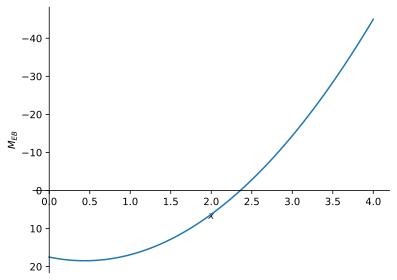

In [ ]:
M_numpy = sym.lambdify(x, M_BC.subs(sol))
x_numpy = np.linspace(0,4,100)
plt.figure()
plt.plot(x_numpy,M_numpy(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$M_{BC}$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

### Solve using digital tools
To solve the system of equations using numerical tools, you can write down the equations as a matrix formulation $Ax=b$ which can easily be solved by ie. your graphical calculator or python.

$$\left[\begin{array}{cccccccc}0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & - \frac{4}{1875} & - \frac{1}{625} & -4 & 1\\0 & 0 & 0 & 0 & \frac{1}{625} & \frac{1}{1250} & 1 & 0\\- \frac{4}{1875} & - \frac{1}{625} & -4 & 1 & 0 & 0 & 0 & -1\\\frac{1}{625} & \frac{1}{1250} & 1 & 0 & 0 & 0 & -1 & 0\\4 & 1 & 0 & 0 & 0 & -1 & 0 & 0\\1 & 0 & 0 & 0 & -1 & 0 & 0 & 0\end{array}\right] \left[ \begin{array}{cccccccc} C_1\\C_2\\C_3\\C_4\\C_5\\C_6\\C_7\\C_8 \end{array} \right] = \left[\begin{matrix}0\\0\\- \frac{8}{375}\\\frac{8}{375}\\0\\0\\0\\0\end{matrix}\right]$$

In [5]:
A,b = sym.linear_eq_to_matrix((eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8), (C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8))
print(sym.latex(A))
print(sym.latex(b))
A = np.array(A).astype(np.float64)
b = np.array(b).astype(np.float64)


\left[\begin{matrix}0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & - \frac{4}{1875} & - \frac{1}{625} & -4 & 1\\0 & 0 & 0 & 0 & \frac{1}{625} & \frac{1}{1250} & 1 & 0\\- \frac{4}{1875} & - \frac{1}{625} & -4 & 1 & 0 & 0 & 0 & -1\\\frac{1}{625} & \frac{1}{1250} & 1 & 0 & 0 & 0 & -1 & 0\\4 & 1 & 0 & 0 & 0 & -1 & 0 & 0\\1 & 0 & 0 & 0 & -1 & 0 & 0 & 0\end{matrix}\right]
\left[\begin{matrix}0\\0\\- \frac{8}{375}\\\frac{8}{375}\\0\\0\\0\\0\end{matrix}\right]


In [2]:
import numpy as np

A = np.array([
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, -4/1875, -1/625, -4, 1],
    [0, 0, 0, 0, 1/625, 1/1250, 1, 0],
    [-4/1875, -1/625, -4, 1, 0, 0, 0, -1],
    [1/625, 1/1250, 1, 0, 0, 0, -1, 0],
    [4, 1, 0, 0, 0, -1, 0, 0],
    [1, 0, 0, 0, -1, 0, 0, 0]
])

b = np.array([
    0,
    0,
    -8/375,
    8/375,
    0,
    0,
    0,
    0
])

In [6]:
np.linalg.solve(A,b)

array([[ 4.37500000e+00],
       [ 0.00000000e+00],
       [-6.66666667e-03],
       [ 0.00000000e+00],
       [ 4.37500000e+00],
       [ 1.75000000e+01],
       [ 3.33333333e-04],
       [ 1.73333333e-02]])

In [7]:
import sympy as sym

A_sym = sym.Matrix(A)
b_sym = sym.Matrix(b)

sol_sym = A_sym.LUsolve(b_sym)

display(sol_sym)

print(sym.latex(sol_sym))

identity = sym.eye(sol_sym.rows)
rr_augmented = identity.row_join(sol_sym)
print(sym.latex(rr_augmented))

Matrix([
[               4.375],
[                   0],
[-0.00666666666666667],
[                   0],
[               4.375],
[                17.5],
[0.000333333333333334],
[  0.0173333333333333]])

\left[\begin{matrix}4.375\\0\\-0.00666666666666667\\0\\4.375\\17.5\\0.000333333333333334\\0.0173333333333333\end{matrix}\right]
\left[\begin{matrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 4.375\\0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & -0.00666666666666667\\0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 4.375\\0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 17.5\\0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0.000333333333333334\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0.0173333333333333\end{matrix}\right]


Alternatively, a symbolic programming language can be used to solve the equations exactly. As an example the [`sympy`](https://docs.sympy.org/latest/index.html) package in `Python` is used:

In [ ]:
import sympy as sym
sym.init_printing()

x = sym.symbols('x')

q = 10 
EI = 5000 
EA = 20000 
F = 150

q_AC = 0
q_BC = q

C_1, C_2, C_3, C_4 = sym.symbols('C_1 C_2 C_3 C_4')
C_5, C_6, C_7, C_8 = sym.symbols('C_5 C_6 C_7 C_8')

V_AC = -sym.integrate(q_AC, x) + C_1
M_AC = sym.integrate(V_AC, x) + C_2
kappa_AC = M_AC/EI
phi_AC = sym.integrate(kappa_AC, x) + C_3
w_AC = -sym.integrate(phi_AC, x) + C_4

V_BC = -sym.integrate(q_BC, x) + C_5
M_BC = sym.integrate(V_BC, x) + C_6
kappa_BC = M_BC/EI
phi_BC = sym.integrate(kappa_BC, x) + C_7
w_BC = -sym.integrate(phi_BC, x) + C_8

eq1 = sym.Eq(w_AC.subs(x,0),0)
eq2 = sym.Eq(M_AC.subs(x,0),0)
eq3 = sym.Eq(w_BC.subs(x,4),0)
eq4 = sym.Eq(phi_BC.subs(x,4),0)
eq5 = sym.Eq(w_AC.subs(x,4)-w_BC.subs(x,0),0)
eq6 = sym.Eq(phi_AC.subs(x,4)-phi_BC.subs(x,0),0)
eq7 = sym.Eq(M_AC.subs(x,4) - M_BC.subs(x,0),0)
eq8 = sym.Eq(V_AC.subs(x,4) - V_BC.subs(x,0),0)

sol = sym.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8],(C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8))
for k, v in sol.items():
    print(f"{k} = {v} ≈ {v.evalf()}")

C_1 = 35/8 ≈ 4.37500000000000
C_2 = 0 ≈ 0
C_3 = -1/150 ≈ -0.00666666666666667
C_4 = 0 ≈ 0
C_5 = 35/8 ≈ 4.37500000000000
C_6 = 35/2 ≈ 17.5000000000000
C_7 = 1/3000 ≈ 0.000333333333333333
C_8 = 13/750 ≈ 0.0173333333333333
